# Sampling of the Regression Coefficients  

This notebook demonstrates how sample from the posterior distribution of the Bayesian linear regression coefficients using third-order and fourth-order Langevin Monte Carlo (LMC) methods.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import holmc as hc
from sklearn.linear_model import LinearRegression

## Generate the synthetic data

In [2]:
seed = 101
np.random.seed(seed)

n = 10000 # Number of samples
d = 10 # Number of features
x_data = np.random.random([n, d]) # Generate random features
theta = np.random.normal(loc=4, scale=1, size=d) # Generate random coefficients
X = np.hstack((np.ones((n, 1)), x_data))
y = 2 + x_data @ theta + 0.05 * np.random.random(n)

# n = 10000
# x_data = np.random.randn(n,1)
# X = np.hstack((np.ones((n, 1)), x_data))
# y = 4 + 0.7 * x_data + np.random.randn(n,1)

## Ordinary Least Squares Estimation

In [3]:
lst_model = LinearRegression(fit_intercept=False)
lst_model.fit(X, y)
print("Coefficients:", lst_model.coef_)

Coefficients: [2.02485633 3.91073102 3.260699   5.62639015 3.49188996 4.97046728
 4.47693214 2.70044737 4.51711369 1.53672969 4.51281167]


## Bayesian Linear Regression

We assume that the prior distribution of the parameters $\theta \in \mathbb{R}^2$ is a multivariate Gaussian distribution with mean $0$ and covariance matrix $\lambda I$. The posterior distribution of the parameters can be derived as 
$$\pi (\theta) \sim \mathcal{N}(\mathbf{m,V})$$
where the posterior mean $\mathbf{m}$ and covariance matrix $\mathbf{V}$ are given by  

\begin{equation*}
\begin{split}
\mathbf{m} &= \left(\Sigma^{-1}+\frac{1}{\xi^2}X^TX\right)^{-1}\left(\frac{1}{\xi^2}X^Ty\right)\\
\mathbf{V} &= \left(\frac{1}{\xi^2}X^TX+\Sigma^{-1}\right)^{-1}
\end{split}
\end{equation*}

where, $\Sigma = \lambda I$


In [4]:
metric=hc.Wasserstein2Distance(X=X,y=y)
prior_mean, prior_cov = metric.priors()
posterior_mean, posterior_cov = metric.posteriors()
print("Prior Mean: {}     Poseterior Mean: {}".format(
    prior_mean, posterior_mean))

print("Prior Covariance: \n{}".format(
    prior_cov))

print("Posterior Covariance: \n{}".format(
    posterior_cov))

Prior Mean: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]     Poseterior Mean: [2.02655303 3.91037847 3.26044844 5.62583318 3.49160815 4.96999913
 4.47651294 2.70023498 4.51671236 1.53666237 4.51239779]
Prior Covariance: 
[[10.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. 10.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 10.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 10.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. 10.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. 10.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. 10.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. 10.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0. 10.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.]]
Posterior Covariance: 
[[ 3.08022249e-03 -6.13538096e-04 -5.66203386e-04 -6.11274720e-04
  -5.73692328e-04 -5.90404052e-04 -5.96936356e-04 -6.05740497e-04
  -5.73346848e-04 -6.05749821e-04 -6.09877604e-04]
 [-6.13538096e-04  1.19797861e-03  1.08429338e-05  4.44898885e-06

## Sampling of the Posterior from the Higher Order Langevin Monte Carlo  

In [5]:
N = 1000 # Number of samples to draw from the posterior
lamb = 4 # Regularization parameter
eta = 0.0004 # Step size for Langevin dynamics
gamma = 20 
xi = 6
o3p = hc.O3Params(eta=eta, gamma=gamma, xi=xi)
sampler3 = hc.HoLMCSamplerO3Regression(
    params=o3p, N=N, seed=seed, show_progress=True
)
gamma = 60
o4p = hc.O4Params(eta=eta, gamma=gamma)
sampler4 = hc.HoLMCSamplerO4Regression(
    params=o4p,
    N=N,
    seed=seed,
    show_progress=True
)
sample3 = sampler3.sample(X=X, y=y, lamb=lamb)
sample4 = sampler4.sample(X=X, y=y, lamb=lamb)

100%|██████████| 1000/1000 [00:00<00:00, 4520.67it/s]


In [6]:
sample4

array([[2.83880992, 1.47287026, 1.45754645, ..., 1.49123418, 1.42374043,
        1.50501651],
       [2.83405015, 1.47127678, 1.45467503, ..., 1.49195371, 1.42117746,
        1.50588515],
       [2.83214521, 1.47133307, 1.4558935 , ..., 1.48385045, 1.420295  ,
        1.5079603 ],
       ...,
       [2.7783289 , 1.38826888, 1.32181686, ..., 1.35339446, 1.28357523,
        1.82749562],
       [2.77573381, 1.39080832, 1.32241617, ..., 1.3525324 , 1.28653312,
        1.82472035],
       [2.77692978, 1.39270257, 1.3187952 , ..., 1.35462098, 1.29145404,
        1.82487272]], shape=(1001, 11))

In [7]:
w2_distances = {}
w2_distances['Order 3'] = metric.w2distance(sample3)
w2_distances['Order 4'] = metric.w2distance(sample4)

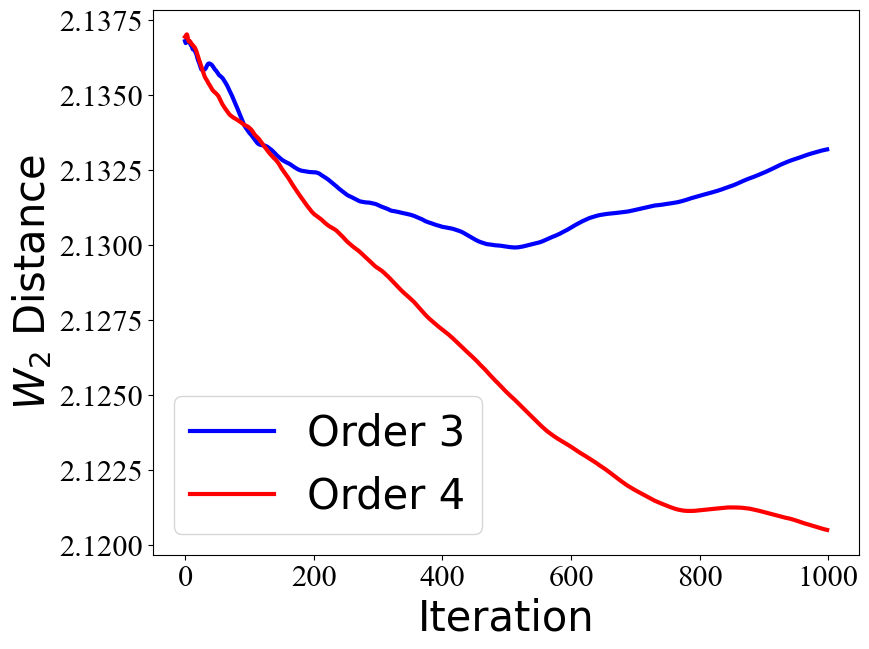

In [8]:
# Plotting
figure, ax = plt.subplots(figsize=(8.8, 6.6))
plt.plot(w2_distances['Order 3'], label='Order 3', color='blue', linewidth=3)
plt.plot(w2_distances['Order 4'], label='Order 4', color='red', linewidth=3)
plt.xlabel("Iteration", fontsize=30)
plt.ylabel("$W_2$ Distance", fontsize=30)
plt.legend(fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=22) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
plt.tight_layout()
plt.show()

## Tuning the Hyperparameters

In [9]:
etas = np.linspace(0.0001, 0.01, 10)
gammas = np.linspace(1, 60,10)
xis = np.linspace(1, 60,10)
search_params_o3 = hc.GridSearchRegression(
    gammas=gammas,
    etas=etas,
    xis=xis,
    N=N,
    seed=seed,
    show_progress=True
)
o3paramspace = search_params_o3.run(
    X=X, y=y, lamb=lamb
)
o3best_eta = o3paramspace.iloc[0,1]
o3best_gamma = o3paramspace.iloc[0,0]
o3best_xi = o3paramspace.iloc[0,3]
o3p = hc.O3Params(eta=o3best_eta, gamma=o3best_gamma, xi=o3best_xi)
sampler3 = hc.HoLMCSamplerO3Regression(
    params=o3p,
    N=N,
    seed=seed,
    show_progress=True
)
sample3 = sampler3.sample(X=X, y=y, lamb=lamb)

Eta:  20%|██        | 2/10 [00:25<01:42, 12.87s/it]/Users/macpc/Library/CloudStorage/OneDrive-FloridaStateUniversity/RESEARCH/nth-order-UnderDampedLangevinDiffusion-2024/higher-order-Langevin-dynamics/holmc/utils/metric.py:92: LinAlgWarning: Matrix is singular. The result might be inaccurate or the array might not have a square root.
  cov_sqrt = sqrtm(sample_cov @ post_cov @ sample_cov)
100%|██████████| 1000/1000 [00:00<00:00, 33026.28it/s]


In [ ]:
o3paramspace

In [ ]:
etas = np.linspace(0.0001, 0.01, 10)
gammas = np.linspace(1, 150,10)
search_params_o4 = hc.GridSearchRegression(
    gammas=gammas,
    etas=etas,
    N=N,
    seed=seed,
    show_progress=True
)
o4paramspace = search_params_o4.run(
    X=X, y=y, lamb=lamb
)
o4best_eta = o4paramspace.iloc[0,1]
o4best_gamma = o4paramspace.iloc[0,0]
o4p = hc.O4Params(eta=o4best_eta, gamma=o4best_gamma)
sampler4 = hc.HoLMCSamplerO4Regression(
    params=o4p, N=N, seed=seed, show_progress=True
)
sample4 = sampler4.sample(X=X, y=y, lamb=lamb)

In [ ]:
o4paramspace

In [ ]:
w2_distances = {}
w2_distances['Order 3'] = metric.w2distance(sample3)
w2_distances['Order 4'] = metric.w2distance(sample4)

# Plotting
figure, ax = plt.subplots(figsize=(8.8, 6.6))
plt.plot(w2_distances['Order 3'], label='Order 3', color='blue', linewidth=3)
plt.plot(w2_distances['Order 4'], label='Order 4', color='red', linewidth=3)
plt.xlabel("Iteration", fontsize=30)
plt.ylabel("$W_2$ Distance", fontsize=30)
plt.legend(fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=22) 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Times New Roman')
plt.tight_layout()
plt.show()

In [10]:
from ucimlrepo import fetch_ucirepo

In [14]:
air_quality = fetch_ucirepo(id=360)
X = air_quality.data.features
y = air_quality.data.targets
X

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,3/10/2004,18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402,88,9.0,939,131,1140,114,1555,1074,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,4/4/2005,10:00:00,3.1,1314,-200,13.5,1101,472,539,190,1374,1729,21.9,29.3,0.7568
9353,4/4/2005,11:00:00,2.4,1163,-200,11.4,1027,353,604,179,1264,1269,24.3,23.7,0.7119
9354,4/4/2005,12:00:00,2.4,1142,-200,12.4,1063,293,603,175,1241,1092,26.9,18.3,0.6406
9355,4/4/2005,13:00:00,2.1,1003,-200,9.5,961,235,702,156,1041,770,28.3,13.5,0.5139
